In [9]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-14   94.660004   95.175003   92.650002   94.949997   94.949997   
2023-02-15   94.739998   97.339996   94.360001   97.099998   97.099998   
2023-02-16   95.540001   97.879997   94.970001   95.779999   95.779999   
2023-02-17   95.070000   95.750000   93.449997   94.589996   94.589996   
2023-02-21   93.239998   93.415001   92.000000   92.050003   92.050003   
...                ...         ...         ...         ...         ...   
2024-02-07  146.119995  147.000000  145.210007  146.679993  146.679993   
2024-02-08  146.970001  147.610001  146.419998  147.220001  147.220001   
2024-02-09  147.949997  150.695007  147.429993  150.220001  150.220001   
2024-02-12  149.539993  150.589996  148.559998  148.729996  148.729996   
2024-02-13  146.070007  148.039993  145.110001  146.369995  146.369995   

              Volume    Change    Ret

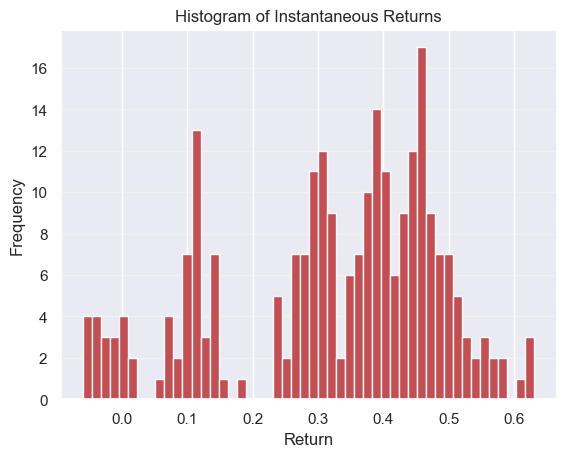

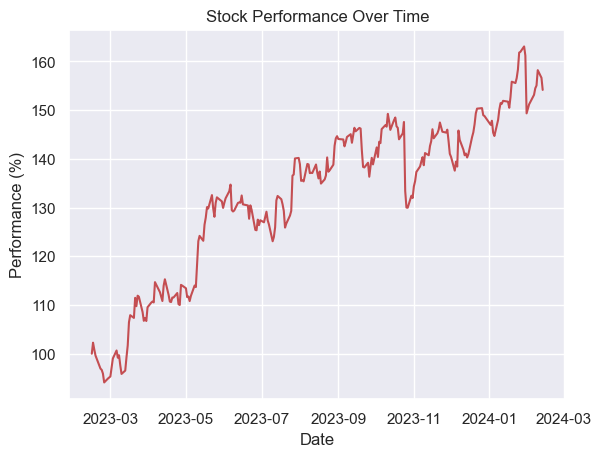

In [10]:
sb.set_theme()  # optional to set plot theme

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

class Stock:

    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()

    def get_data(self):
        """method that downloads data and stores in a DataFrame."""
        data = yf.download(self.symbol, start=self.start, end=self.end) 
        self.calc_returns(data)
        return data

    def calc_returns(self, data):
        """method that adds change and return columns to data"""
        data['Change'] = data['Close'].pct_change() #change over time 
        data['Return'] = (1 + data['Change']).cumprod() - 1 #returns over time

    def plot_return_dist(self):
        """method that plots instantaneous returns as histogram"""
        plt.hist(self.data['Return'], bins=50, color='r', edgecolor='w')
        plt.grid(axis='y', alpha=0.3)
        plt.xlabel('Return')
        plt.ylabel('Frequency')
        plt.title('Histogram of Instantaneous Returns')
        plt.show()
    
    def plot_performance(self):
        """method that plots stock object performance as percent."""
        plt.plot(self.data['Close'] / self.data['Close'].iloc[0] * 100, color='r')
        plt.grid(True)
        plt.xlabel('Date')
        plt.ylabel('Performance (%)')
        plt.title('Stock Performance Over Time')
        plt.show()


def main(): #had trouble with this one
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()
    


if __name__ == '__main__':
    my_stock = Stock("GOOG")
    print(my_stock.data)
    my_stock.plot_return_dist()
    my_stock.plot_performance()
